In [2]:
import matplotlib.image as img 
import matplotlib.pyplot as plt
import pytesseract
import cv2
import os
from skimage import io
from PIL import Image  
import numpy as np
import re
import pandas as pd

In [78]:

# 왜곡 계수 설정 ---①
k1, k2, k3 = 0.5, 0.2, 0.1 # 배럴 왜곡
#k1, k2, k3 = -0.3, 0, 0    # 핀큐션 왜곡



path="C:/Users/qjawl/Desktop/대외활동/창의융합캡스톤/cosmetics/cosmetics/images/ocr/ocr_13.jpg"
img = io.imread(path)

#win_name = "scanning"
#rows, cols = img.shape[:2]
#draw = img.copy()
#pts_cnt = 0
#pts = np.zeros((4,2), dtype=np.float32)

rows, cols = img.shape[:2]

draw = img.copy()
pts_cnt = 0
pts = np.zeros((4, 2), dtype=np.float32)

def onMouse(event, x, y, flags, param):
    global pts_cnt
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(draw, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow(win_name, draw)
        pts[pts_cnt] = [x, y]
        pts_cnt += 1
        if pts_cnt == 4:
            sm = pts.sum(axis=1)  # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis=1)  # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]  # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]  # x+y가 가장 큰 값이 우하단 좌표
            topRight = pts[np.argmin(diff)]  # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]  # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])

            w1 = abs(bottomRight[0] - bottomLeft[0])
            w2 = abs(topRight[0] - topLeft[0])
            h1 = abs(topRight[1] - bottomRight[1])
            h2 = abs(topLeft[1] - bottomLeft[1])
            width = max([w1, w2])  # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])  # 두 상하 거리간의 최대값이 서류의 높이

            # 변환 후 4개 좌표
            pts2 = np.float32([[0, 0], [width - 1, 0],
                               [width - 1, height - 1], [0, height - 1]])

            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
         
            width=np.int(width)
            height=np.int(height)
            result = cv2.warpPerspective(img, mtrx, (width,height))
            cv2.imshow('scanned', result)

cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

원본 이미지 shape : (361, 587, 3)
gray 이미지 shape : (542, 880)
 

! [ 사 용 법 ] 적 당 량 을 손에 덜 어 부 드 럽 게 발 라 줍 니 다 .

[ 전 성 분 ] 정 제 수 , 에 틸 헬 스 테 아 레 이 트 , 글 리 세 린 , 글 리 세 릴
스 테 아 레 이 트 에 스 이 , 하 이 드 로 제 네 이 티 드 코 코 - 글 리 세 라 이 즈 ,
세 테 아 릴 알 코 올 , 페 녹 시 에 탄 올 , 스 테 아 릭 애 씨 드 , 팔 미 틱 애 씨
드 , 벤 질 알 코 올 , 다 이 메 티 콘 , 프 로 필 렌 글 라 이 콜 , 카 보 머 , 향 료 ,
소 등 하 이 드 록 사 이 드 , 카 프 릴 릴 글 라 이 콜 , 데 실 렌 글 라 이 콜 , 비
사 보 롤 , 실 신 나 몰 , 리 날 룰 , 부 틸 렌 글 라 이 콜 , 겐 티 아 나 뿌 리 추
출 물 , 마 트 리 카 리 아 꽃 추 출 물 , 벤 질 살 리 실 레 이 트 , 리 모 덴 , 시 트
로 넬 올 , 글 루 코 오 스 , 락 틱 애 씨 드 , 알 파 - 아 이 소 메 틸 아 이 오 논 ,
소 듬 벤 조 에 이 트 , 시 트 랄 , 아 르 니 카 몬 타 나 추 출 물 , 독 일 가 문
비 잎 추 출 물 , 레 몬 밤 잎 추 출 물 , 두 송 열 매 추 출 물 , 서 양 고 추 나 물
꽃 / 잎 / 줄 기 추 출 물 , 헤 이 플 라 워 추 출 물 , 쿠 마 린 , 포 타 숍 솔 베이
트 , 제 라 니 올 , 솔 비 톨 , 카 라 멜



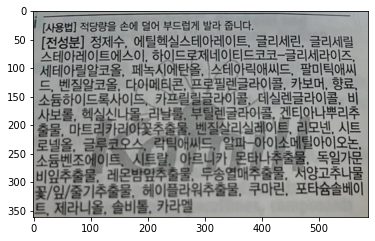

In [3]:
path="C:/Users/qjawl/Desktop/대외활동/창의융합캡스톤/cosmetics/cosmetics/images/ocr/ocr_1.jpg"

###################전처리#####################
img = io.imread(path)
print('원본 이미지 shape :',img.shape)
plt.imshow(img)
img=cv2.resize(img,None,fx=1.5,fy=1.5) ## 가세연 1.3배
###############################################

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('gray 이미지 shape :',gray.shape)
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)
gray_scale_img=io.imread(filename)
pil_image=Image.fromarray(gray_scale_img)
pil_image.show()


gray=cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)[1]
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)
gray_scale_img=io.imread(filename)
pil_image=Image.fromarray(gray_scale_img)
pil_image.show()


#################################################################333

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe' 
text = pytesseract.image_to_string(Image.open(filename), lang = 'kor')
print(text)
os.remove(filename)



    


In [6]:
text_r=text_parse(text)
print(text_r)

['정제수', '에틸헬스테아레이트', '글리세린', '글리세릴스테아레이트에스이', '글리세라이즈', '세테아릴알코올', '페녹시에탄올', '스테아릭애씨드', '팔미틱애씨드', '벤질알코올', '다이메티콘', '프로필렌글라이콜', '카보머', '향료', '소등하이드록사이드', '카프릴릴글라이콜', '데실렌글라이콜', '비사보롤', '실신나몰', '리날룰', '부틸렌글라이콜', '겐티아나뿌리추출물', '마트리카리아꽃추출물', '벤질살리실레이트', '리모덴', '시트로넬올', '글루코오스', '락틱애씨드', '아이소메틸아이오논', '소듬벤조에이트', '시트랄', '아르니카몬타나추출물', '독일가문비잎추출물', '레몬밤잎추출물', '두송열매추출물', '줄기추출물', '헤이플라워추출물', '쿠마린', '포타숍솔베이트', '제라니올', '솔비톨']


In [6]:
data_base=pd.read_excel('C:/Users/qjawl/Desktop/창융/화장품데이터/화장품.xlsx')
data_base=data_base.T
result_data=filter_data(text_r)


NameError: name 'text_r' is not defined

In [5]:
a=result_data[result_data.iloc[:,0]=='정제수']
b=a[1]
b=list(b)

NameError: name 'result_data' is not defined

In [5]:
def filter_data(text_r):
    data_filter_result=[]
    data_filter_label=[]

    for text in text_r:
        sig=0
        label_index=0
        a=0

        for i in range(len(data_base.index)):
            for data in data_base.iloc[i]:
                if data==text:
                    sig=1
                    label_index=i

        if sig ==1:
            data_filter_label.append(data_base.index[label_index])
        else:
            data_filter_label.append('영향없음')
        data_filter_result.append(text)
    data_filter_result=pd.Series(data_filter_result)
    data_filter_label=pd.Series(data_filter_label)
    df_result=pd.concat([data_filter_result,data_filter_label],axis=1)
    return(df_result)

In [4]:
def text_parse(text):
    text_result=[]
    try:
        text=text.replace(" ","")
    except:
        text="".join(text)
        text=text.replace(" ","")
    text=text.replace('\n',"")
    text=text.strip()
    text=list(text)
    text_pre_1=[]
    sig=0
    text_sig=0

    for i in range(len(text)):
        if ((text[i-1]=='성')&(text[i]=='분')):
            sig=1
        if sig==1:
            text_pre_1.append(text[i])
    text_pre_1="".join(text_pre_1)
    #print('성분 Parsing :\n',text_pre_1)
    
    
    p=re.compile('\w+,') #정규식 
    text_pre_2=p.findall(text_pre_1)
    text_pre_2=list(text_pre_2)

    
    for i in range(len(text_pre_2)):
        text_pre_2[i]=text_pre_2[i].replace(',',"") #쉼표 지우기 
        #print(text_pre_2[i])
        text_result.append(text_pre_2[i])
    #print(text_pre_2)
    return(text_result)

In [124]:
result_data.to_excel('C:/Users/qjawl/Desktop/화장품데이터/result.xlsx')